<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202302/blob/main/Lecture01/Notebook_SS01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Regresión Lineal para predicción

Modelo 

$$
y= f(X) + u
$$

$$
y= X\beta + u
$$


Queremos predecir: $Y_i$

> *Ejemplo:* el logaritmo del salario

Características (aka **predictores**, **features**): $X_i=\left(X_{1i},\ldots,X_{pi}\right)'$

> *Ejemplo:* educación, edad, educación de los padres, habilidad cognitiva, etc.


In [3]:
%matplotlib inline

# import some useful packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


plt.style.use('seaborn-whitegrid')



In [4]:
nlsy=pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')


In [5]:
nlsy.head()

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
0,4.076898,16,0,0,0,11,7.0724,12,12,3,...,0,0,0,0,0,0,0,0,0,0
1,3.294138,9,0,0,0,19,4.7481,9,10,2,...,0,0,0,0,0,1,0,0,0,0
2,2.830896,9,0,1,0,22,1.1987,12,9,3,...,0,0,0,0,0,0,0,0,1,0
3,4.306459,16,0,0,0,13,8.9321,16,18,2,...,1,0,0,0,0,0,0,0,0,0
4,5.991465,16,0,1,0,15,2.2618,16,16,1,...,0,0,0,0,0,0,0,0,0,0


## Regresión Lineal: log(salario) en polinomios de educación

In [6]:
# generate dictionary of transformations of education
powerlist=[nlsy['educ']**j for j in np.arange(1,10)]
X=pd.concat(powerlist,axis=1)
X.columns = ['educ'+str(j) for j in np.arange(1,10)]


# standardize our X matrix (doesn't matter for OLS, but will matter for lasso below)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)



In [7]:
nlsy.head()

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
0,4.076898,16,0,0,0,11,7.0724,12,12,3,...,0,0,0,0,0,0,0,0,0,0
1,3.294138,9,0,0,0,19,4.7481,9,10,2,...,0,0,0,0,0,1,0,0,0,0
2,2.830896,9,0,1,0,22,1.1987,12,9,3,...,0,0,0,0,0,0,0,0,1,0
3,4.306459,16,0,0,0,13,8.9321,16,18,2,...,1,0,0,0,0,0,0,0,0,0
4,5.991465,16,0,1,0,15,2.2618,16,16,1,...,0,0,0,0,0,0,0,0,0,0


### Corremos la regresión

In [8]:
# run least squares regression
# instantiate and fite our regression object:
reg=linear_model.LinearRegression().fit(X_scaled,nlsy['lnw_2016'])


In [9]:
print(reg) #ver los resultados

LinearRegression()


In [ ]:
#stargazer(reg,type="text") #Similar en stata: outreg2 

## Predicción

$$
\hat{y} = \hat{\beta}_0 +  \hat{\beta}_1 educ + .... +  \hat{\beta}_{10} educ^{10}
$$

In [10]:
#predict me simplifica hacer la operación X\hat{\beta}

# generate predicted values
yhat=reg.predict(X_scaled)


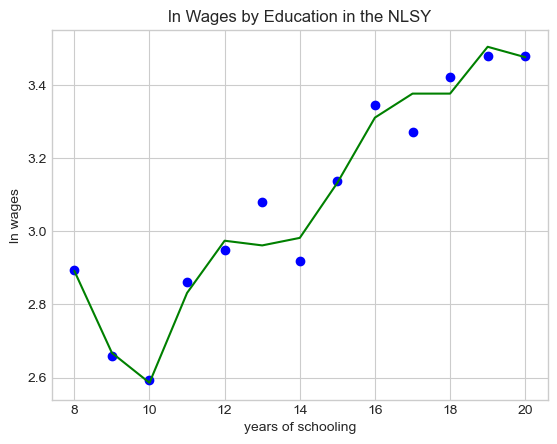

In [11]:
# plot predicted values
lnwbar=nlsy.groupby('educ')['lnw_2016'].mean()
Xbar=pd.DataFrame({'educ':lnwbar.index.values})
powerlist=[Xbar['educ']**j for j in np.arange(1,10)]
Xbar=pd.concat(powerlist,axis=1)
Xbar.columns = X.columns
Xbar_scaled = scaler.transform(Xbar)
ybarhat=reg.predict(Xbar_scaled)
fig = plt.figure()
ax = plt.axes()
ax.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat,'g-');
plt.title("ln Wages by Education in the NLSY")
plt.xlabel("years of schooling")
plt.ylabel("ln wages");

Como podemos ver, la regresión lineal de mínimos cuadrados puede aproximar cualquier función continua y ciertamente puede usarse para la predicción. 

Incluyendo un conjunto lo suficientemente rico de transformaciones, las predicciones de OLS producirán estimaciones insesgadas del verdadero predictor ideal: la función de expectativa condicional. Pero estas estimaciones serán bastante ruidosas.